In [13]:
# Davi Costa Barroso
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import pi, plot, I
t = sp.symbols('t')
j = I

In [14]:
x = sp.exp(-t/2)
t0 = pi
s = sp.fourier_series(x, (t, 0, t0))
s1 = s.truncate(n=50)
s1 = s1.evalf(3)

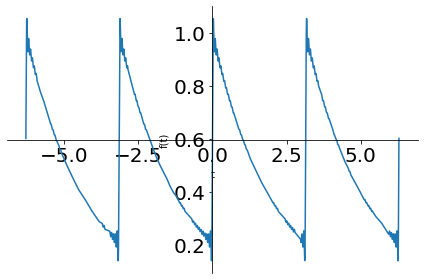

In [15]:
p = plot(s1, (t, -2*pi, 2*pi))

# Serie Trigonometrica







In [16]:
# Encontrar A0
a0 = (1/pi)*sp.integrate(x, (t, 0, pi))
a0.evalf(3)

0.504

In [17]:
# Encontrar W0 e An
w0 = 2*pi/t0
n = sp.symbols('n', constant=True)
an = lambda n: (2/pi)*sp.integrate(x*(sp.cos(n*w0*t)), (t, 0, t0))
an(2).evalf(3)

0.0155

In [18]:
# Encontrar Bn
bn = lambda n:  (2/pi)*sp.integrate(x*(sp.sin(n*w0*t)), (t, 0, t0))
bn(2).evalf(3)

0.124

# Serie Exponencial

In [19]:
Dn = lambda n: (1/t0)*sp.integrate(x * (sp.exp(-j*n*w0*t)), (t, 0, t0))
# Dn =(1/t0)*sp.integrate(x * (sp.exp(-j*n*w0*t)), (t, 0, t0))
# Dn.simplify().evalf(3)

In [20]:
N = 3
D = np.zeros(2*N+1).astype(complex)
n = np.arange(-N, N+1)


In [21]:
for k in np.arange(0, len(n)):
    D[k] = Dn(n[k])
D.round(3)

array([0.003+0.042j, 0.008+0.062j, 0.03 +0.119j, 0.504+0.j   ,
       0.03 -0.119j, 0.008-0.062j, 0.003-0.042j])

In [22]:
magDn = np.abs(D)
phaseDn = np.angle(D)*180/np.pi

Text(0.5, 1.0, 'Espectro de Magnitude de x(t)')

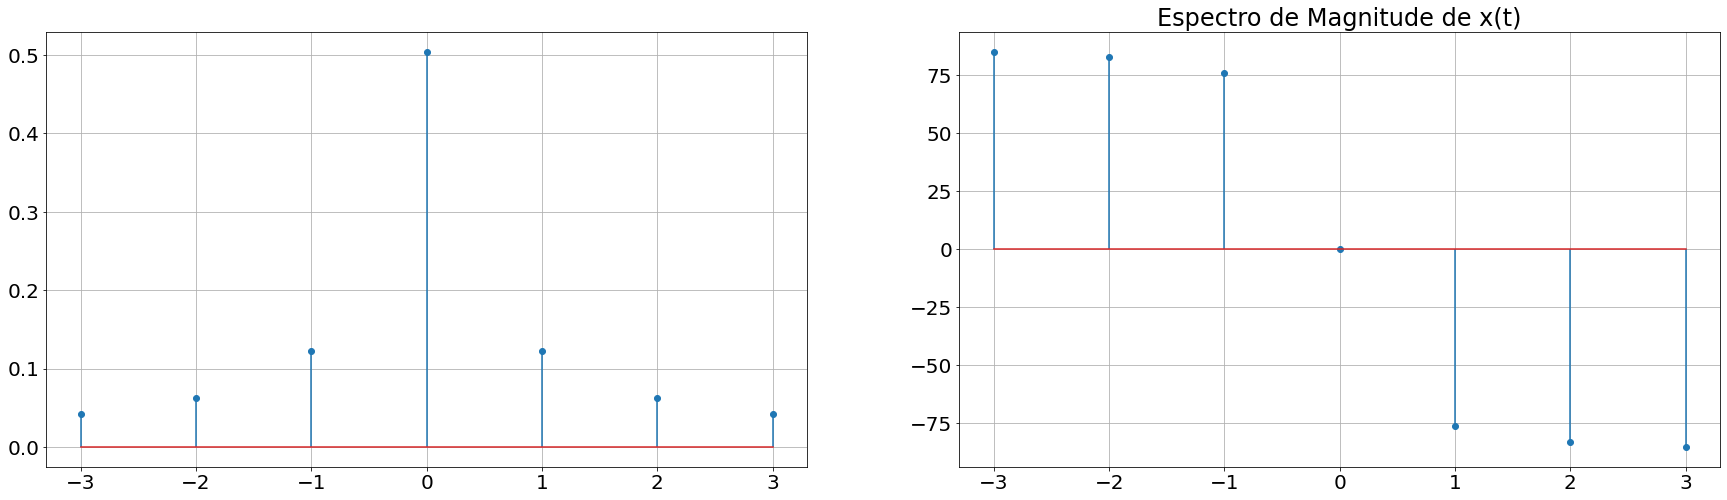

In [23]:
plt.figure(figsize=(30,8))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.subplot(121)
plt.stem(n, magDn)
plt.grid()
plt.subplot(122)
plt.stem(n, phaseDn)
plt.grid()
plt.title('Espectro de Magnitude de x(t)', fontsize=24)

In [24]:
# Sintese de x(t):
t = np.arange(-3*np.pi, 3*np.pi, 0.01)
xt = np.zeros((np.size(t)))

for k in np.arange(0, len(n)):
    xt = xt + D[k]*sp.exp(1j*w0*n[k]*t)